In [1]:
from PIL import Image
import numpy
from maze_generator import generate_maze

In [2]:
def print_table(listx):
    """returns a grid of a list of lists of numbers

    list of list -> grid"""
    for lists in listx:
        for i in lists:
            print(i,end='\t')
        print()
    print('*************************************************************************************')


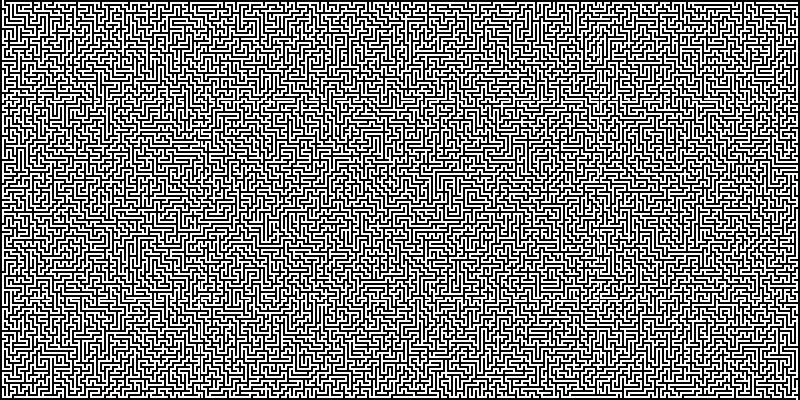

In [3]:
maze_width = 200
maze_height = int(maze_width/2)
maze_image =  generate_maze(maze_width, maze_height)

pix = numpy.array(maze_image)
maze_matrix = []

for row in pix:
    maz_row = []
    for pixel in row:
        if pixel[0] == 255:
            maz_row.append(0)
        else:
            maz_row.append(1)
    maze_matrix.append(maz_row)

image = maze_image.resize((800,400),Image.NEAREST)
image

In [ ]:
maze_height = len(maze_matrix)
maze_width = len(maze_matrix[0])

solved_maze = [[0 for x in range(maze_width)] for x in range(maze_height)]

start_x = 0
start_y = 1

end_x = len(maze_matrix)-1
end_y = len(maze_matrix[len(maze_matrix) - 1]) - 2

solved_maze[start_x][start_y] = 1

step = 0

while solved_maze[end_x][end_y] == 0:
    step = step + 1
    for x in range(maze_height):
        for y in range(maze_width):
            if solved_maze[x][y] == step:
                if (x - 1) >= 0 and maze_matrix[x-1][y] == 0 and solved_maze[x-1][y] == 0:
                    solved_maze[x-1][y] = step + 1
                if (x + 1) < maze_height and maze_matrix[x + 1][y] == 0 and solved_maze[x + 1][y] == 0:
                    solved_maze[x+1][y] = step + 1
                if (y - 1) >= 0 and maze_matrix[x][y-1] == 0 and solved_maze[x][y-1] == 0:
                    solved_maze[x][y-1] = step + 1
                if (y + 1) < maze_width and maze_matrix[x][y + 1] == 0 and solved_maze[x][y + 1] == 0:
                    solved_maze[x][y+1] = step + 1
    #print_table(solved_maze)

In [ ]:
path = []
x = end_x
y = end_y

step = solved_maze[x][y]
path.append((x, y))

while step > 1:
    if x - 1 >= 0 and solved_maze[x-1][y] == step - 1:
        x -= 1
        path.append((x, y))
        step -= 1
    if x + 1 < maze_height and solved_maze[x+1][y] == step - 1:
        x += 1
        path.append((x, y))
        step -= 1
    if y - 1 >= 0 and solved_maze[x][y-1] == step - 1:
        y -= 1
        path.append((x, y))
        step -= 1
    if  y + 1 < maze_width and solved_maze[x][y+1] == step - 1:
        y += 1
        path.append((x, y))
        step -= 1


In [ ]:
im = Image.new("RGB",(len(solved_maze[0]), len(solved_maze)))
pixels = []

for x in range(len(solved_maze)):
    for y in range(len(solved_maze[0])):
        pixel = (0, 0, 0)
        if maze_matrix[x][y] == 0:
            pixel = (255, 255, 255)
                      
        if solved_maze[x][y] > 0:
            pixel = (0, 0, 255)
        
        if (x, y) in path:
            pixel = (255, 0, 0)
            
        pixels.append(pixel)
            


im.putdata(pixels)
image = im.resize((1000,500),Image.NEAREST)
image